In [2]:
conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    convertdate-2.1.3          |          py_1000          30 KB  conda-forge
    ephem-3.7.6.0              |py37hfa6e2cd_1001         682 KB  conda-forge
    fbprophet-0.5              |   py37h6538335_0         520 KB  conda-forge
    holidays-0.9.10            |             py_0          36 KB  conda-forge
    lunardate-0.2.0            |             py_0          21 KB  conda-forge
    m2-base-1.0.0              |                3         178 KB
    m2-bash-4.3.042            |                5         3.5 MB
    m2-bash-completion-2.3     |                2         187 KB
    m2-catgets-1.1             |                3          26 KB
    m2-coreutils-8.25          |              102   

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


In [3]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

In [21]:
df = pd.read_csv('barkley_marathon_pageviews.csv')
df.head(2)

,Date,Barkley Marathons
0,2015-07-01,101
1,2015-07-02,122


In [22]:
df.tail(2)

,Date,Barkley Marathons
1421,2019-05-22,944
1422,2019-05-23,1001


In [6]:
df.dtypes

Date                 object
Barkley Marathons     int64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [20]:
df.head(2)

,ds,y,Mean Baseline
0,2015-07-01,101.0,1317.279691
1,2015-07-02,122.0,1317.279691


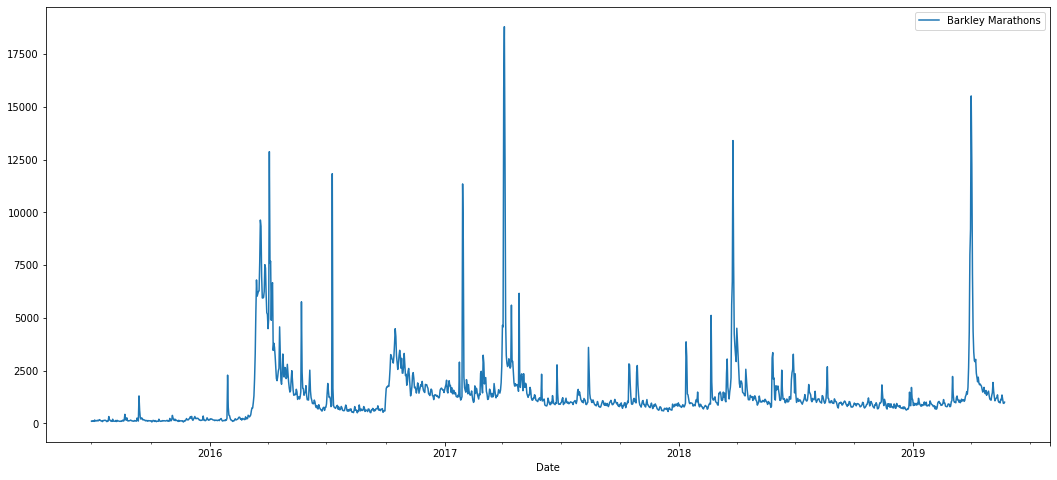

In [9]:
df.plot(figsize=(18,8));

In [25]:
df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-23'))
df.head(2)

,ds,Date,y
2015-07-01,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN


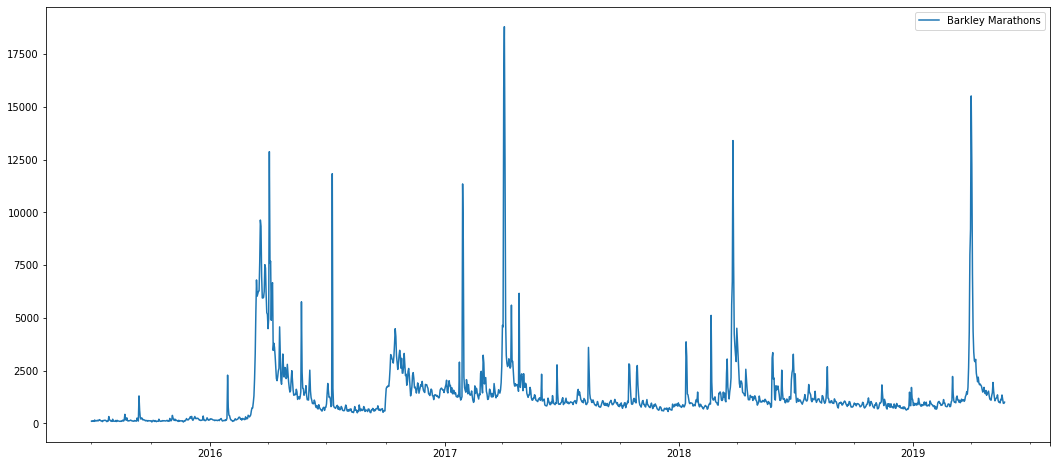

In [12]:
df.plot(figsize=(18,8));

In [13]:
df['Barkley Marathons'].mean()

1317.279690794097

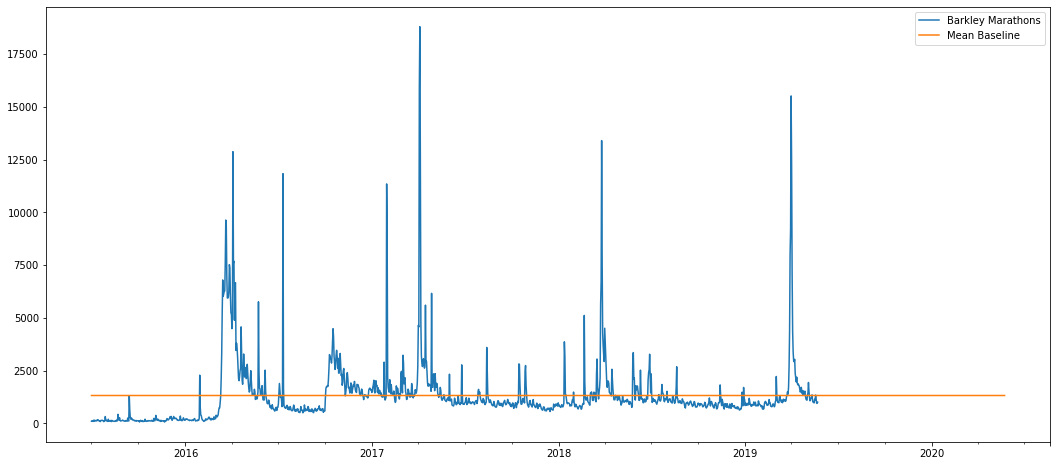

In [14]:
df['Mean Baseline'] = df['Barkley Marathons'].mean()
df.plot(figsize=(18,8));

In [24]:
df = df.reset_index().rename(columns={'index': 'ds', 'Barkley Marathons': 'y'})
df.head(2)

,ds,Date,y
0,0,2015-07-01,101
1,1,2015-07-02,122


In [16]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lilyx\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [23]:
future = m.make_future_dataframe(periods=365)
future.tail(2)

,ds
2152,2021-05-22
2153,2021-05-23


In [18]:
forecast = m.predict(future)

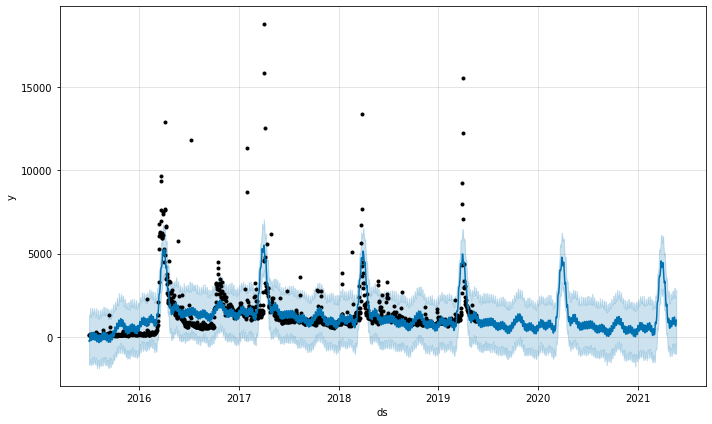

In [19]:
fig1 = m.plot(forecast)